In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
#I also have to submit this!

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

### Visualize/Explore Data - If You Want, You Do You

In [8]:
print(df.isnull().sum())
print(len(df))

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
not.fully.paid       0
dtype: int64
9578


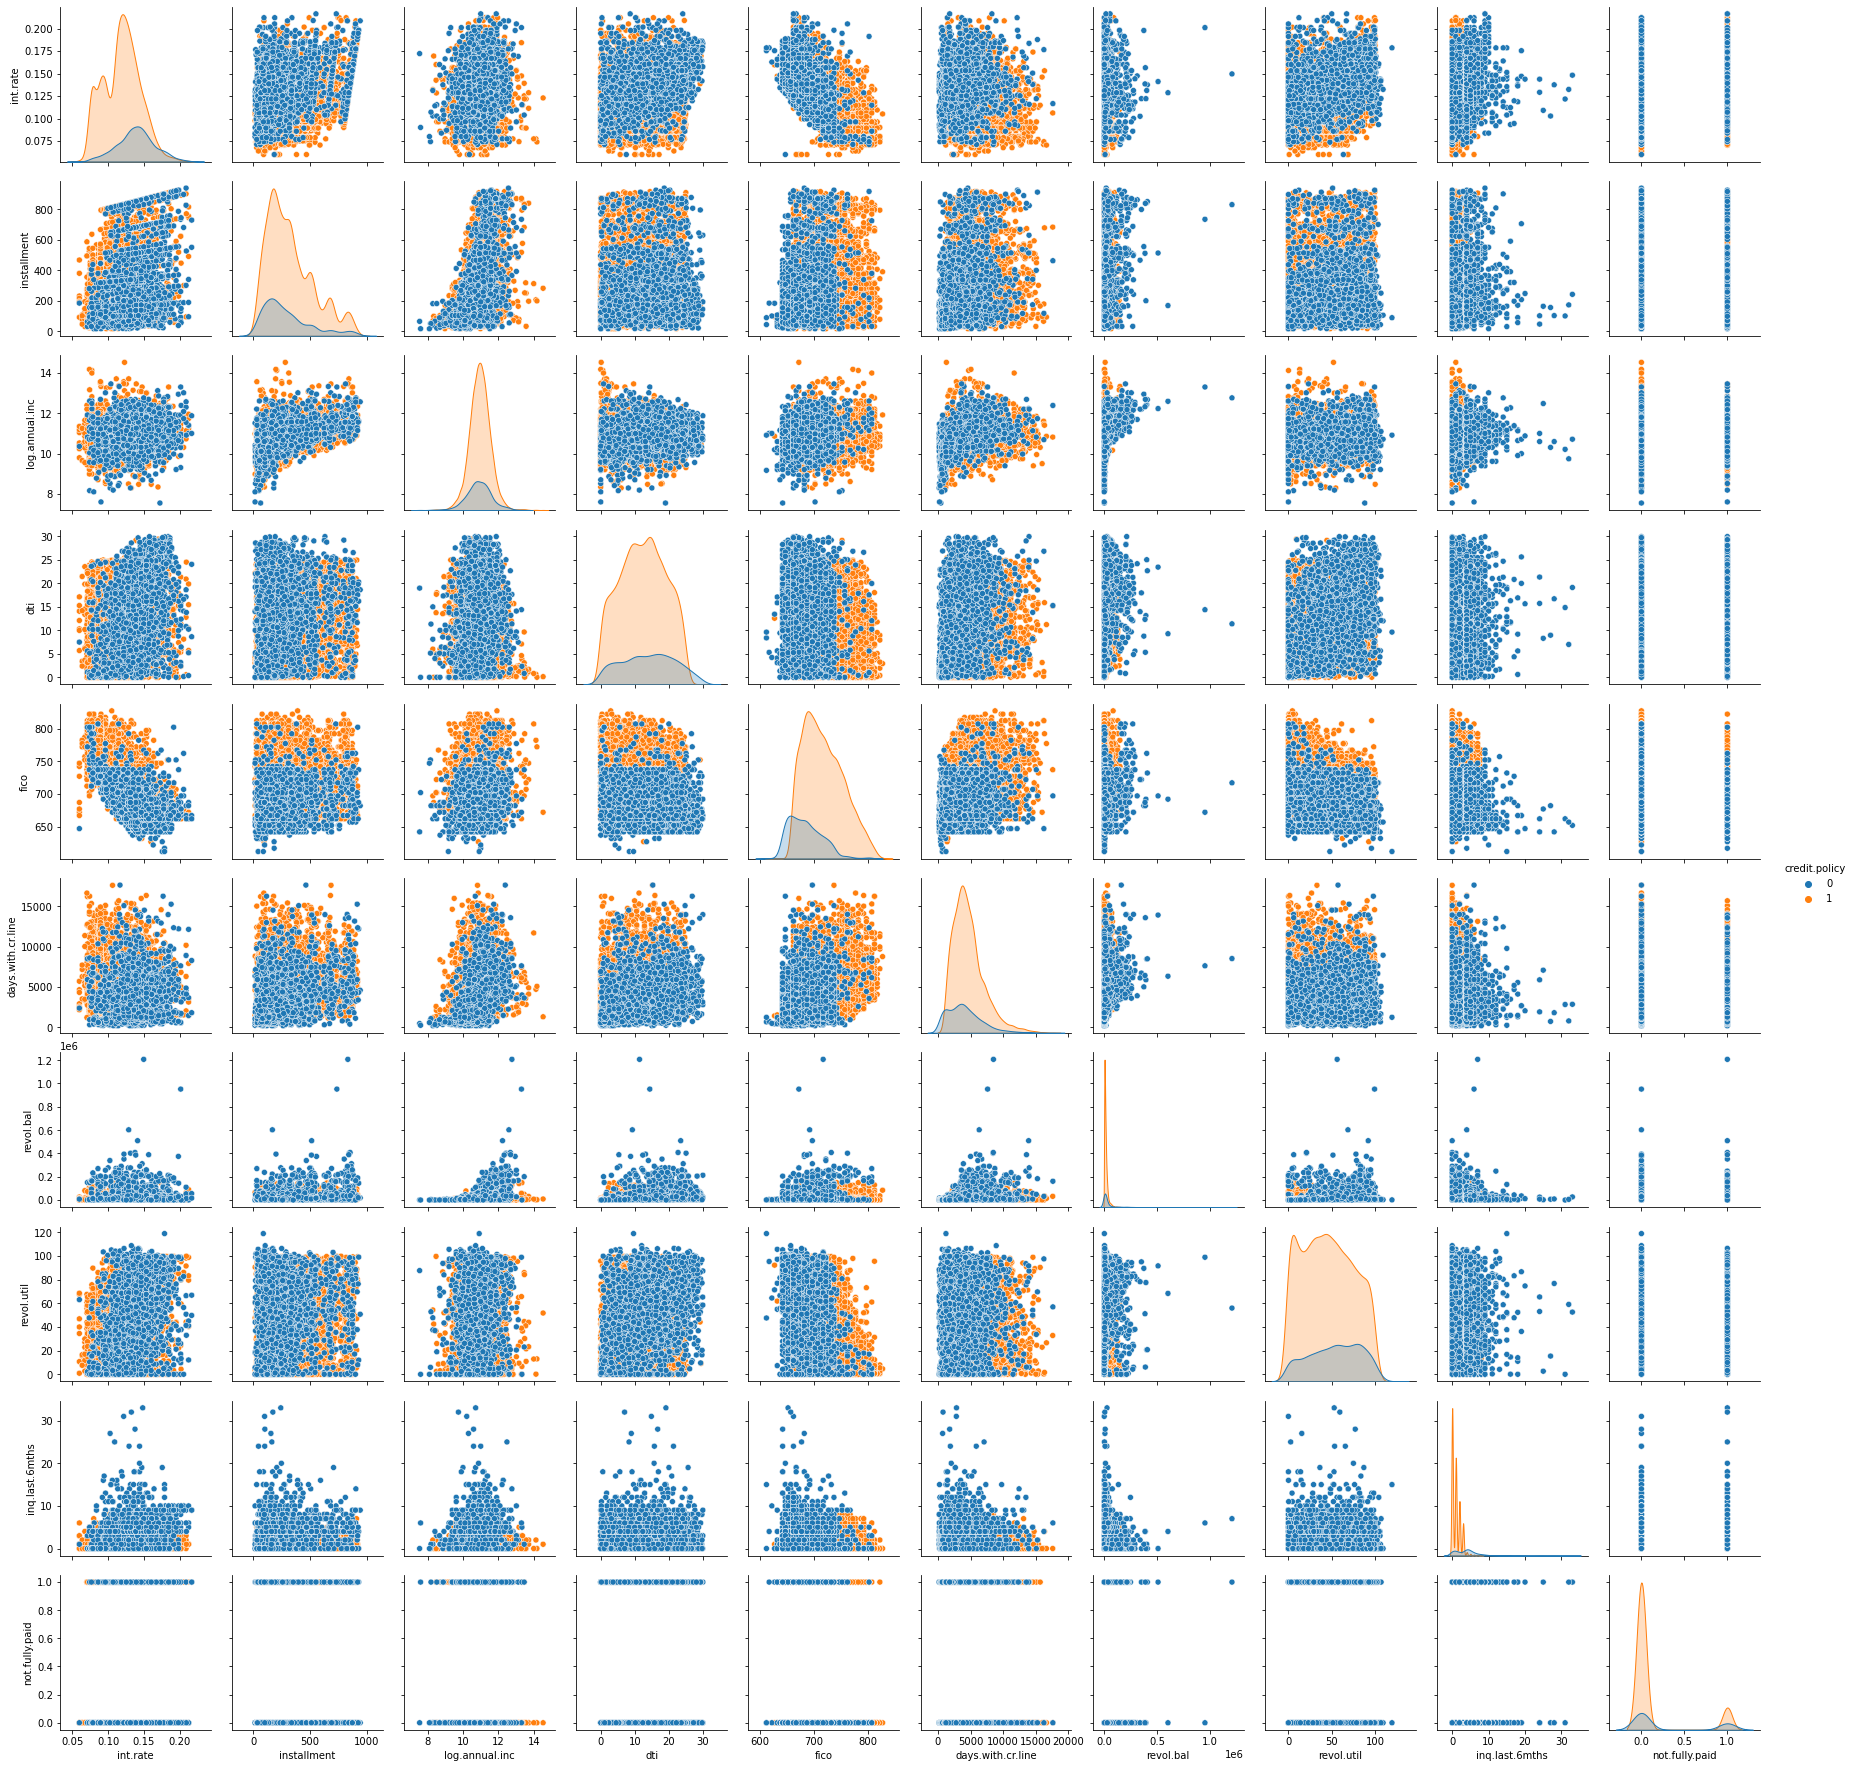

In [25]:
sns.pairplot(df,hue="credit.policy")

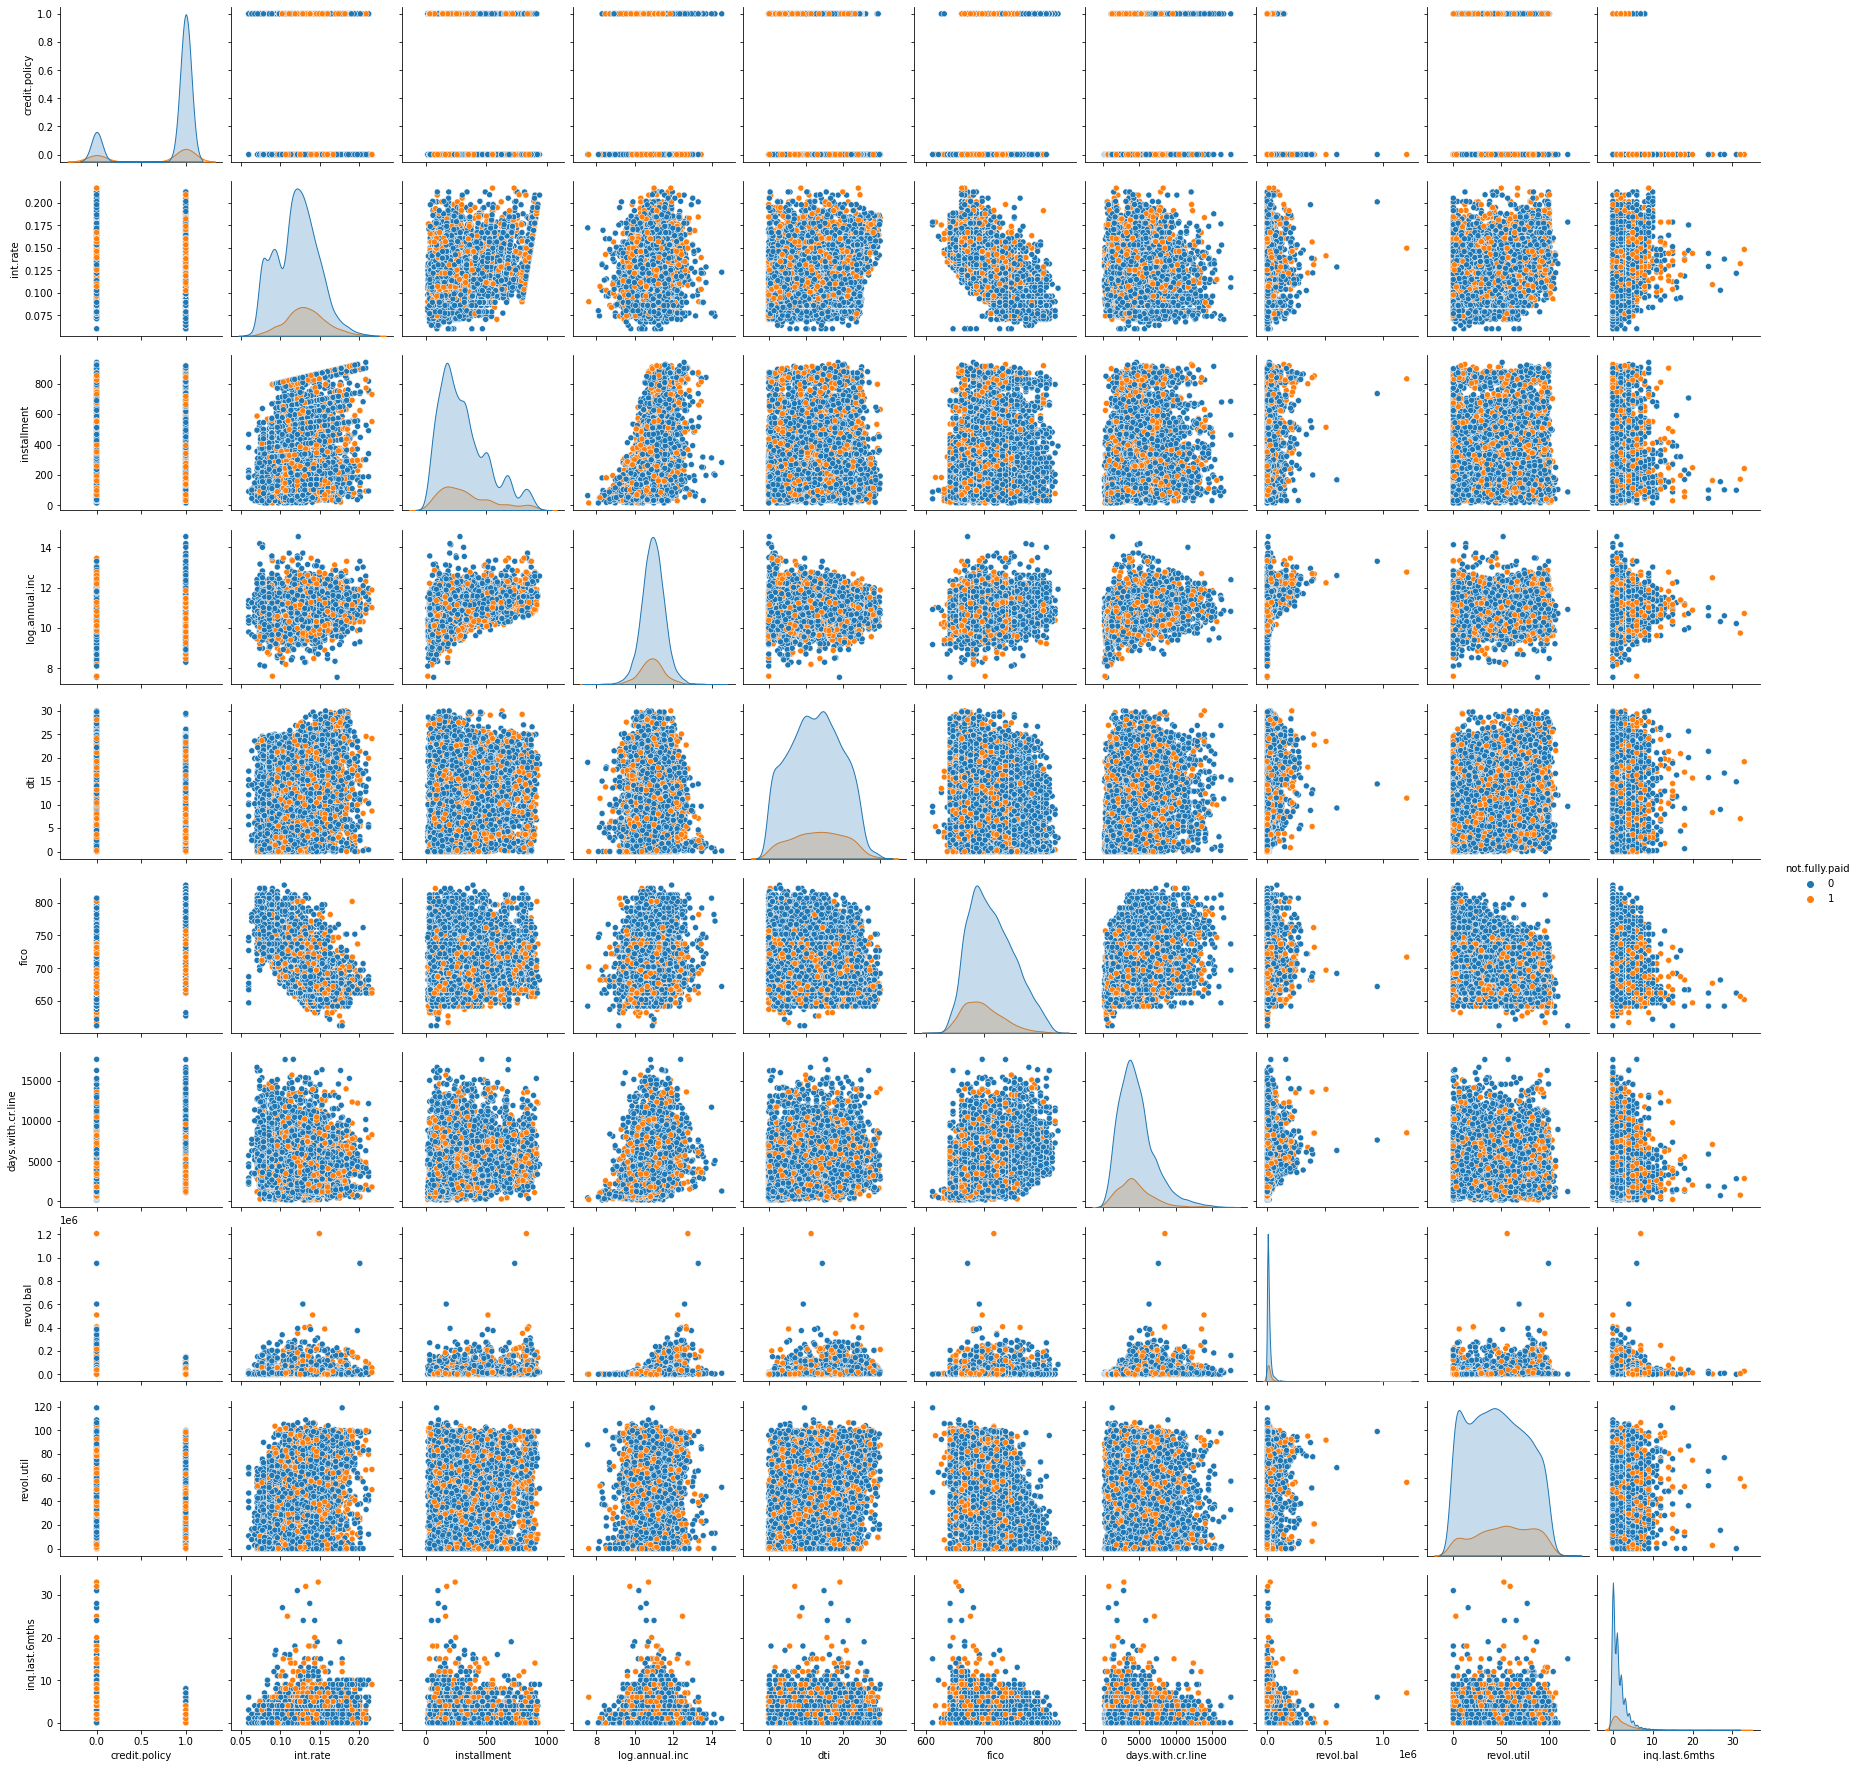

In [26]:
sns.pairplot(df,hue="not.fully.paid")

## Solutions

In [13]:
#stat sig
dPaid = df[df["not.fully.paid"] == 1].fico
dNotPaid = df[df["not.fully.paid"] == 0].fico
stat, pval = ss.ttest_ind(dPaid, dNotPaid)
print(stat,pval)

-14.812743547869088 4.227100096647354e-49


In [16]:
#credit policy
dRated = df[df["credit.policy"] == 1].fico
dManU = df[df["credit.policy"] == 0].fico
stat2, pval2 = ss.ttest_ind(dRated, dManU)
print(stat2,pval2)

36.36259987408664 2.6100416830751396e-271


In [27]:
dRatedIncome = df[df["credit.policy"] == 1]["log.annual.inc"]
dNotRatedIncome = df[df["credit.policy"] == 0]["log.annual.inc"]
stat3, pval3 = ss.ttest_ind(dRatedIncome,dNotRatedIncome)
print(stat3,pval3)
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dRatedIncome,dNotRatedIncome)
alpha = .05
nobs = len(dRatedIncome)  + len(dNotRatedIncome)

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
print(pow)

lowestAmount = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
print(lowestAmount)

3.4178817682392073 0.0006337324172012597
1.0
1157.6455504969408


In [31]:
#mean income
dIncomeNotLogged = np.exp(df["log.annual.inc"])
print(dIncomeNotLogged.sample(20)) #seems reasonable
print("Mean income:",np.mean(dIncomeNotLogged))

7759      4000.000000
841      79999.999708
4434    139913.000021
6630     50999.999913
7990     36000.000092
3788    117999.999593
5169     28000.000024
1943     45000.000056
4265     47499.999999
2865    125000.000464
7545     79999.999708
1259     27499.999899
2390     84996.000379
2283    115000.000305
5709     42000.000115
7776     60999.999808
414      35243.999965
8016    115200.000317
4440     83499.999930
7796     99999.999503
Name: log.annual.inc, dtype: float64
Mean income: 68402.03071015503


<AxesSubplot:xlabel='fico', ylabel='Density'>

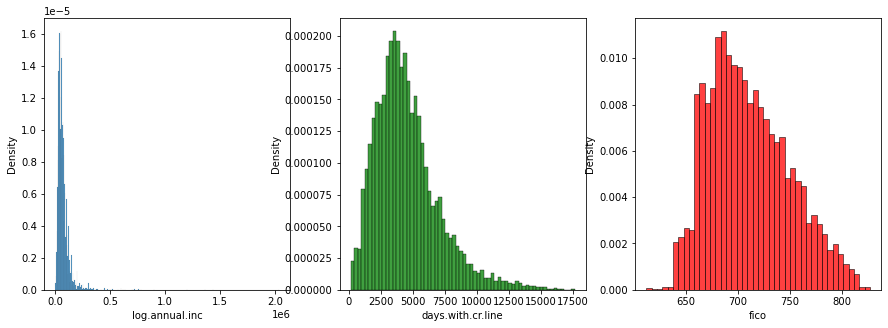

In [36]:
#skew, can I just look?
fig, axs = plt.subplots(ncols=3)
sns.histplot(dIncomeNotLogged, ax=axs[0], stat="density")
sns.histplot(df["days.with.cr.line"], color="green", ax=axs[1], stat="density")
sns.histplot(df["fico"], color="red",ax=axs[2], stat="density")

In [37]:
#prediction: days with credit line

#I don't think that's good enough lets use math:
incSkew = thinkstats2.PearsonMedianSkewness(dIncomeNotLogged)
daysSkew = thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"])
ficoSkew = thinkstats2.PearsonMedianSkewness(df["fico"])

print(incSkew,daysSkew, ficoSkew)

0.6210290601166143 0.5056178217400077 0.30390788935426843


^ nailed it

In [55]:
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean())

groups.get_group(1)["log.annual.inc"].head()

1 612 1341 60231.432107263354
2 672 6007 67593.95498610557
3 742 2085 74025.49061873481
4 802 145 96581.13203052751


4     11.299732
6     10.714418
11    11.835009
19    11.002100
22    11.512925
Name: log.annual.inc, dtype: float64

In [69]:
# print(groups.get_group(1)["log.annual.inc"].var())
# print(groups.get_group(2)["log.annual.inc"].var())
# print(groups.get_group(3)["log.annual.inc"].var())
# print(groups.get_group(4)["log.annual.inc"].var())
print(groups["log.annual.inc"].var())
print(groups["log.annual.inc"].count())

1    0.371378
2    0.375231
3    0.365343
4    0.456305
Name: log.annual.inc, dtype: float64
1    1341
2    6007
3    2085
4     145
Name: log.annual.inc, dtype: int64


In [67]:
#test levene I have 4 groups
varStat, varP = ss.levene(groups.get_group(1)["log.annual.inc"],
    groups.get_group(2)["log.annual.inc"],
    groups.get_group(3)["log.annual.inc"],
    groups.get_group(4)["log.annual.inc"])
varP

0.9263504638963115

In [70]:
#anova
print(ss.f_oneway(groups.get_group(1)["log.annual.inc"],
    groups.get_group(2)["log.annual.inc"],
    groups.get_group(3)["log.annual.inc"],
    groups.get_group(4)["log.annual.inc"])
    )

print(ss.f_oneway(groups.get_group(1)["log.annual.inc"],
    groups.get_group(2)["log.annual.inc"],
    groups.get_group(3)["log.annual.inc"]))

F_onewayResult(statistic=37.177011948803724, pvalue=7.052161427262523e-24)
F_onewayResult(statistic=39.71593370170285, pvalue=6.665430079905029e-18)


In [71]:
print(groups["log.annual.inc"].count()/df["log.annual.inc"].count())

1    0.140008
2    0.627166
3    0.217686
4    0.015139
Name: log.annual.inc, dtype: float64


In [79]:
y = np.array(df["fico"]).reshape(-1,1)
xinc = np.array(df["log.annual.inc"]).reshape(-1,1)
xIntRate = np.array(df["int.rate"]).reshape(-1,1)
xUtil = np.array(df["revol.util"]).reshape(-1,1)
print(y.shape)
print (xinc.shape)
print (xIntRate.shape)
print(xUtil.shape)

(9578, 1)
(9578, 1)
(9578, 1)
(9578, 1)


In [ ]:
from sklearn.model_selection import train_test_split
xTraininc,xTestinc,yTraininc,yTestinc = train_test_split(xinc,y,test_size=.3)
xTrainIntRate,xTestIntRate,yTrainIntRate,yTestIntRate = train_test_split(xIntRate,y,test_size=.3)
xTrainUtil,xTestUtil,yTrainUtil,yTestUtil = train_test_split(xUtil,y,test_size=.3)

modelinc = LinearRegression().fit(xTraininc, yTraininc)
modelIntRate = LinearRegression().fit(xTrainIntRate, yTrainIntRate)
modelUtil = LinearRegression().fit(xTrainUtil, yTrainUtil)

predsinc = modelinc.score(xTestinc, yTestinc)
predsIntRate = modelinc.score(xTestinc, yTestinc)
predsinc = modelinc.score(xTestinc, yTestinc)
